# Multiple Linear Regression

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Understanding, Cleaning and Transformation
### 1.1. Data Understanding
The data at hand has three features about the spending on advertising, and the target variable is the net sales.
- TV - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads
- Social Media - Independent variable quantifying budget for social media ads
- Influncer - Independent variable quantifying budget for Influncer marketing
- Sales - Dependent variable

In [2]:
data = 'data/sales_advertising.csv'
ad_data = pd.read_csv(data)
ad_data

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866
4568,71,20.610685,6.545573,Nano,249.101915
4569,44,19.800072,5.096192,Micro,163.631457
4570,71,17.534640,1.940873,Macro,253.610411


In [3]:
ad_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   int64  
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 178.7+ KB


In [5]:
ad_data.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4568.000000,4566.000000,4566.000000
mean,54.058618,18.160356,3.323956,192.466602
std,26.101674,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
ad_data.dtypes

TV                int64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [7]:
print(f"The data has {ad_data.shape[0]} rows and {ad_data.shape[1]} columns.")

The data has 4572 rows and 5 columns.


In [8]:
ad_data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [9]:
ad_data['Influencer'].unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [10]:
ad_data['InfluencerNew'] = ad_data['Influencer'].map({'Mega':3, 'Micro':2, 'Nano':1, 'Macro':0})
ad_data['InfluencerNew'].head()

0    3
1    3
2    3
3    3
4    2
Name: InfluencerNew, dtype: int64

### We can find the sum, mean, median, std, min, and max using the below method and with describe()

In [11]:
print("Sum of columns data")
print("-"*50,"\n")
for col in ad_data:
    if col in ['TV', 'Radio', 'Social Media', 'InfluencerNew', 'Sales']:
        print(col)
        print(f"Sum of {col} = {ad_data[col].sum()}")
        print("-"*50)

Sum of columns data
-------------------------------------------------- 

TV
Sum of TV = 247156
--------------------------------------------------
Radio
Sum of Radio = 82956.505717683
--------------------------------------------------
Social Media
Sum of Social Media = 15177.183832886
--------------------------------------------------
Sales
Sum of Sales = 878802.50521883
--------------------------------------------------
InfluencerNew
Sum of InfluencerNew = 6919
--------------------------------------------------


### 1.2. Data Cleaning

In [12]:
print("Original DataFrame:")
display(ad_data)

third_column = ad_data.pop('InfluencerNew')

ad_data.insert(3,'InfluencerNew', third_column)

print()
print("Final DataFrame:")
display(ad_data)


Original DataFrame:


,TV,Radio,Social Media,Influencer,Sales,InfluencerNew
0,16,6.566231,2.907983,Mega,54.732757,3
1,13,9.237765,2.409567,Mega,46.677897,3
2,41,15.886446,2.913410,Mega,150.177829,3
3,83,30.020028,6.922304,Mega,298.246340,3
4,15,8.437408,1.405998,Micro,56.594181,2
...,...,...,...,...,...,...
4567,26,4.472360,0.717090,Micro,94.685866,2
4568,71,20.610685,6.545573,Nano,249.101915,1
4569,44,19.800072,5.096192,Micro,163.631457,2
4570,71,17.534640,1.940873,Macro,253.610411,0



Final DataFrame:


,TV,Radio,Social Media,InfluencerNew,Influencer,Sales
0,16,6.566231,2.907983,3,Mega,54.732757
1,13,9.237765,2.409567,3,Mega,46.677897
2,41,15.886446,2.913410,3,Mega,150.177829
3,83,30.020028,6.922304,3,Mega,298.246340
4,15,8.437408,1.405998,2,Micro,56.594181
...,...,...,...,...,...,...
4567,26,4.472360,0.717090,2,Micro,94.685866
4568,71,20.610685,6.545573,1,Nano,249.101915
4569,44,19.800072,5.096192,2,Micro,163.631457
4570,71,17.534640,1.940873,0,Macro,253.610411


#### Checking the null data

In [13]:
print(ad_data.isnull())
print(ad_data.isnull().sum())

         TV  Radio  Social Media  InfluencerNew  Influencer  Sales
0     False  False         False          False       False  False
1     False  False         False          False       False  False
2     False  False         False          False       False  False
3     False  False         False          False       False  False
4     False  False         False          False       False  False
...     ...    ...           ...            ...         ...    ...
4567  False  False         False          False       False  False
4568  False  False         False          False       False  False
4569  False  False         False          False       False  False
4570  False  False         False          False       False  False
4571  False  False         False          False       False  False

[4572 rows x 6 columns]
TV               0
Radio            4
Social Media     6
InfluencerNew    0
Influencer       0
Sales            6
dtype: int64


In [14]:
#remove = ['Radio','Social Media']
#clean_data = ad_data.drop(remove, inplace =True, axis =1)
#clean_data

In [15]:
# replace missing values of sales with the median
medSales = ad_data['Sales'].median()
print(f"Median value of Sales: {medSales}")
ad_data['Sales'] = ad_data['Sales'].fillna(medSales)

# replace missing values of radio with the median
medRadio = ad_data['Radio'].median()
print(f"Median value of Radio: {medRadio}")
ad_data['Radio'] = ad_data['Radio'].fillna(medRadio)

# replace missing values of social media with the median
medSocial = ad_data['Social Media'].median()
print(f"Median value of Social Media {medSocial}")
ad_data['Social Media'] = ad_data['Social Media'].fillna(medSocial)

Median value of Sales: 189.23117235
Median value of Radio: 17.85951293
Median value of Social Media 3.055565435


In [16]:
ad_data.drop(['Influencer'], axis=1)

,TV,Radio,Social Media,InfluencerNew,Sales
0,16,6.566231,2.907983,3,54.732757
1,13,9.237765,2.409567,3,46.677897
2,41,15.886446,2.913410,3,150.177829
3,83,30.020028,6.922304,3,298.246340
4,15,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,2,94.685866
4568,71,20.610685,6.545573,1,249.101915
4569,44,19.800072,5.096192,2,163.631457
4570,71,17.534640,1.940873,0,253.610411


In [17]:
ad_data.isnull().sum()

TV               0
Radio            0
Social Media     0
InfluencerNew    0
Influencer       0
Sales            0
dtype: int64

In [18]:
ad_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

In [19]:
# Testing the iloc
ad_data.iloc[:5, :2]

,TV,Radio
0,16,6.566231
1,13,9.237765
2,41,15.886446
3,83,30.020028
4,15,8.437408


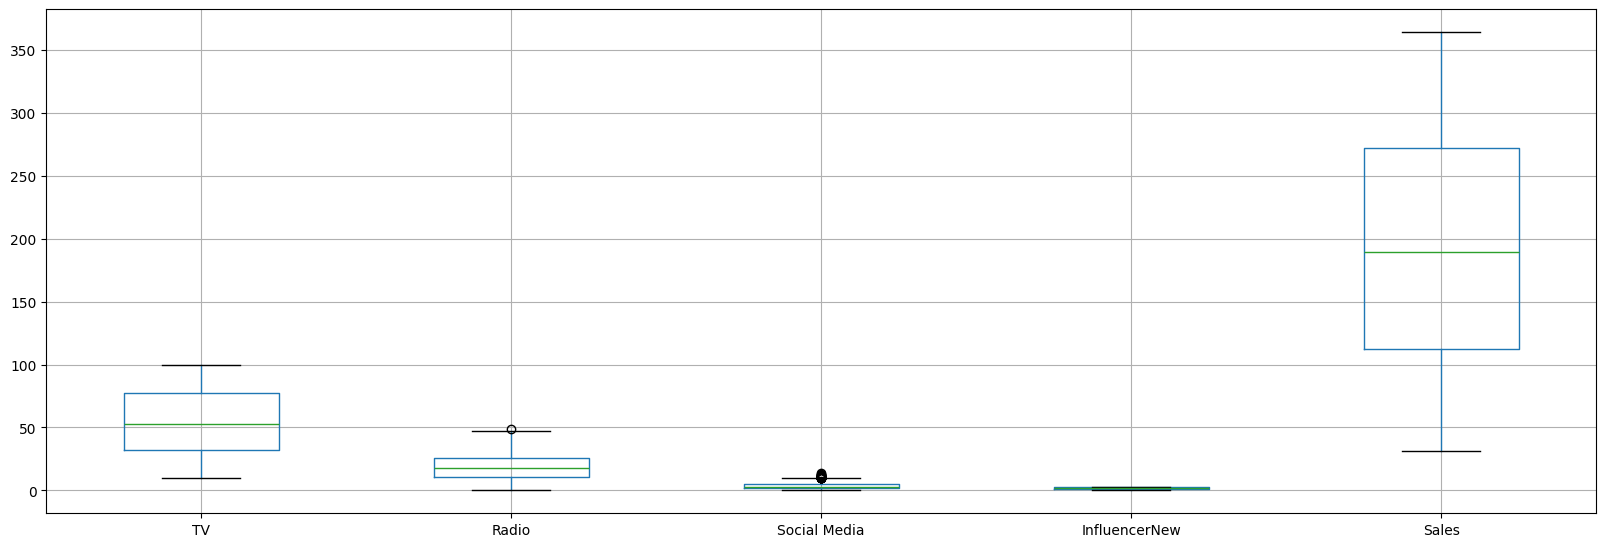

In [20]:
ad_data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

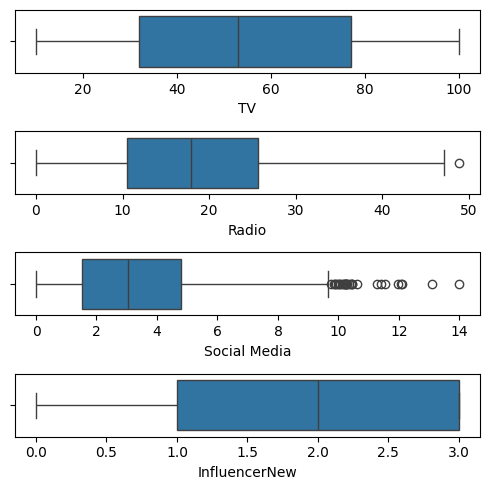

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize=(5,5))
plt1 = sns.boxplot(x=ad_data['TV'], ax = axs[0])
plt2 = sns.boxplot(x=ad_data['Radio'], ax =  axs[1])
plt3 = sns.boxplot(x=ad_data['Social Media'], ax = axs[2])
plt4 = sns.boxplot(x=ad_data['InfluencerNew'], ax = axs[3])
plt.tight_layout()
plt.show()

In [22]:
remove = ['Social Media', 'Influencer']
clean_data = ad_data.drop(remove, axis = 1)
clean_data.head()

,TV,Radio,InfluencerNew,Sales
0,16,6.566231,3,54.732757
1,13,9.237765,3,46.677897
2,41,15.886446,3,150.177829
3,83,30.020028,3,298.246340
4,15,8.437408,2,56.594181


### 1.3. Identify Dependent and Independent Variables
- The dependent variable in ML problem is the target that we are attempting to predict.
- The independent variable are the features or inputs used to make the prediction.

In [23]:
# Displaying the correlation between dataset
clean_data.corr()

,TV,Radio,InfluencerNew,Sales
TV,1.000000,0.866421,-0.019913,0.996085
Radio,0.866421,1.000000,-0.005973,0.867371
InfluencerNew,-0.019913,-0.005973,1.000000,-0.018138
Sales,0.996085,0.867371,-0.018138,1.000000


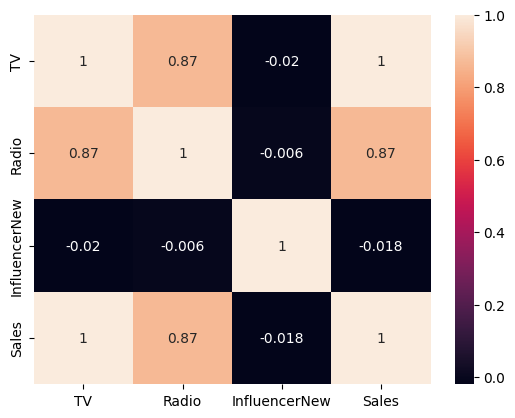

In [24]:
sns.heatmap(clean_data.corr(), annot=True)
plt.show()

In [25]:
# Independent Variables
X = clean_data.iloc[:,:-2]
X.head()

,TV,Radio
0,16,6.566231
1,13,9.237765
2,41,15.886446
3,83,30.020028
4,15,8.437408


In [26]:
y = clean_data['Sales']
y.head()

0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64

## 2. Data Analysis and Visualization

C:\Users\Satya\AppData\Local\Temp\ipykernel_18384\4047274075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X)


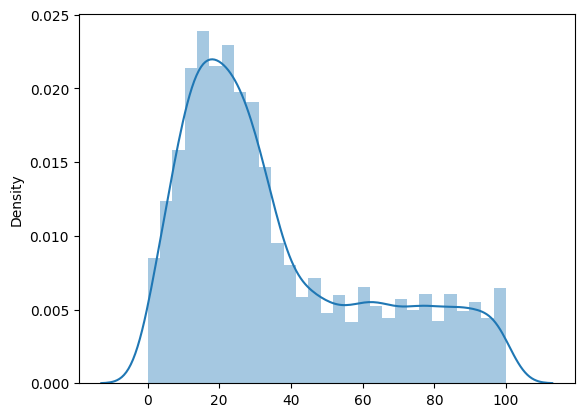

In [27]:
sns.distplot(X)
plt.show()

C:\Users\Satya\AppData\Local\Temp\ipykernel_18384\2662093251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


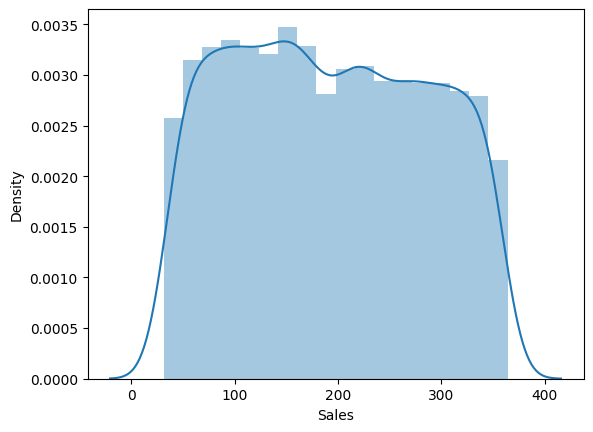

In [28]:
sns.distplot(y)
plt.show()

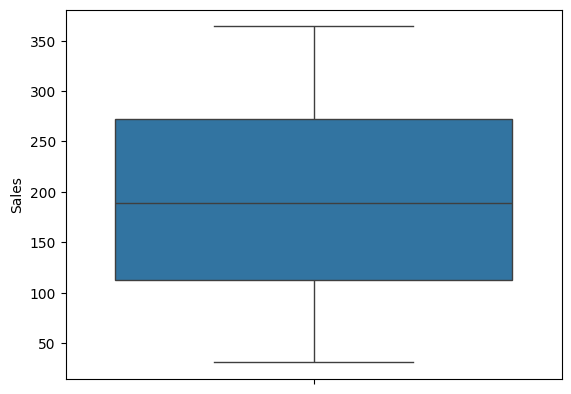

In [29]:
sns.boxplot(y)
plt.show()

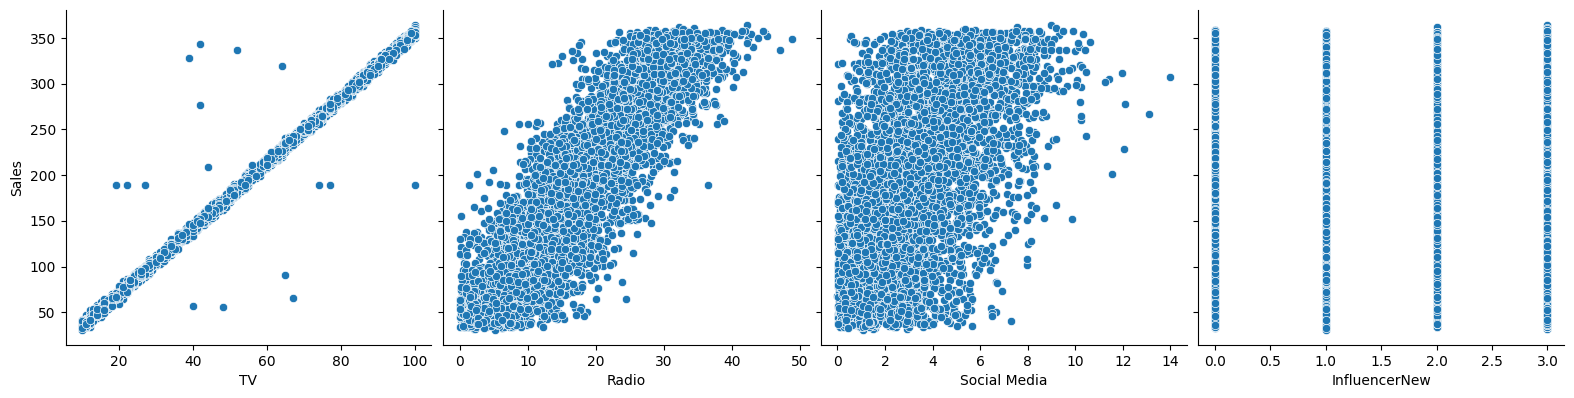

In [30]:
sns.pairplot(ad_data, x_vars=['TV', 'Radio', 'Social Media', 'InfluencerNew'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

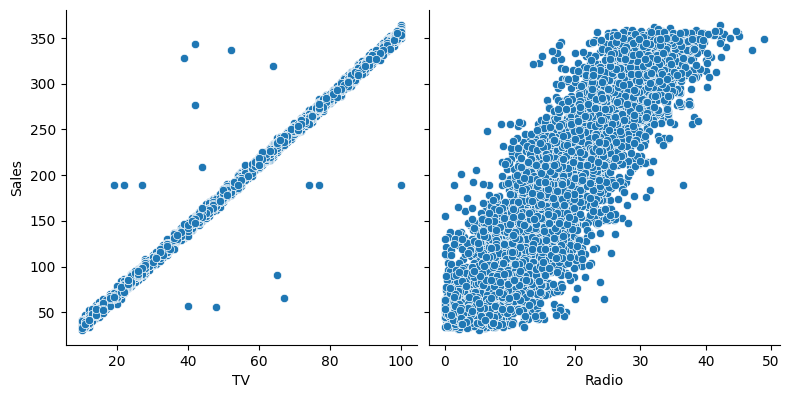

In [31]:
sns.pairplot(clean_data, x_vars=['TV', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

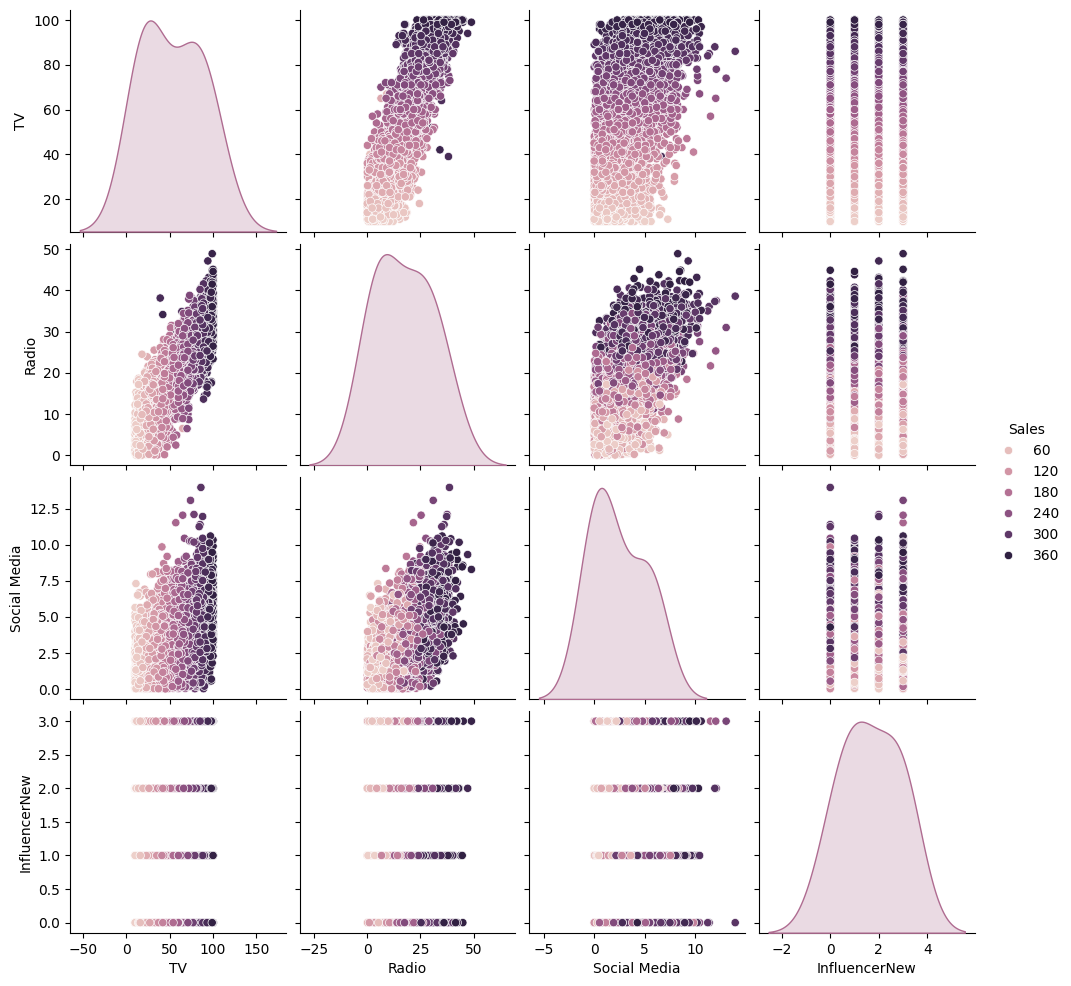

In [32]:
sns.pairplot(ad_data, hue='Sales')
plt.show()

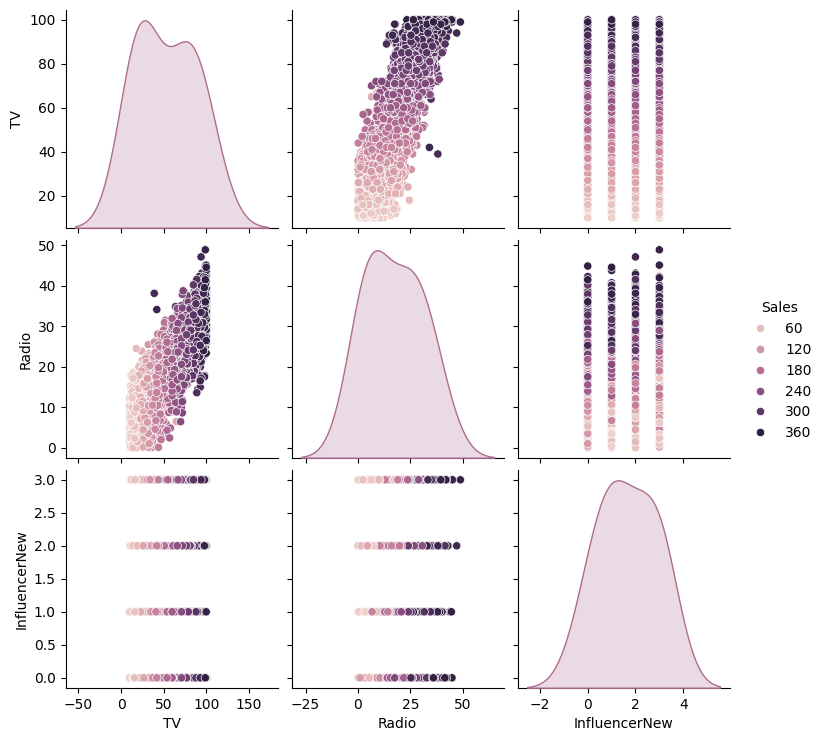

In [33]:
sns.pairplot(clean_data, hue='Sales')
plt.show()

## **3. Build Primary Model[Multiple Linear Regression]**
### **From Scratch**
#### **Store the array in the Matrix form:**
Implement the following equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
\end{align}

In ML learning parameters $\theta$ are also called weights, so from this step onwards we are represent $\theta$ as **W**.

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
\end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
\end{align}

\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
\end{align}

The x0 array is used as the intercept in the regression model, with each row corresponding to a sample and each column corresponding to a feature. The W array provides the initial values for the regression model's coefficients, and the Y2 array is the target or dependent variable.


In [37]:
TV = clean_data['TV'].to_numpy()
Radio = clean_data['Radio'].to_numpy()
Sales = clean_data['Sales'].to_numpy()

# iitializing Matrices which act as an Container to hold our Data.
x0 = np.ones(len(TV))
X2 = np.array([TV, Radio]).T
W = np.array([0,0])
Y2 = np.array(Sales)

We will use the Cost function: Mean Square Error i.e.

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
\end{align}

Further Simplification:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
\end{align}

Here:
\begin{align}
  h_\theta = \theta_1*x 
\end{align}

Note: In ML, m: denotes the length of the array (total No of rows in our case)

In [36]:
# Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
        X: Feature Matrix or independent variable
        Y: Target Matrix or dependent variable
        W: Weight Matrix
    Output Parameters:
        J: accumulated mean square error.
    """
    m = len(Y)

    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

The cost function measures the difference between the predicted values and the actual values, given the inputs and the parameters W. The purpose of the cost function is to evaluate the performance of machine learning model and to guide the optimization process towards finding the best parameters that minimize the cost.

In [38]:
initial_cost = cost_function(X2, Y2, W)
initial_cost

np.float64(22851.132480826433)

## Step-3: Optimization Algorithm
Our goal in this task is to minimize our error function with each input of examples(input data).
One of the most suitable methods to do the same is Gradient Descent Algorithm.

Implement GDA from Scratch.

Function to estimate:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>h</mi>
    <mi>&#x3B8;</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msup>
    <mi>&#x3B8;</mi>
    <mi>T</mi>
  </msup>
  <mi>x</mi>
</math>

Loss function to minimize:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">(</mo>
  <msub>
    <mi>h</mi>
    <mi>&#x3B8;</mi>
  </msub>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
</math>

Gradient Descent updated:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3B8;</mi>
    <mo stretchy="false">(</mo>
  </msub>
  <mi>j</mi>
  <mo>+</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>&#x3B8;</mi>
    <mi>j</mi>
  </msub>
  <mo>&#x2212;</mo>
  <mi>L</mi>
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>D</mi>
    <mi>&#x3B8;</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>
<br/>

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>D</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x3B8;</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>1</mn>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>m</mi>
  <mo>&#x2217;</mo>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>&#x3B8;</mi>
    <mi>T</mi>
  </msup>
  <mo>&#x2217;</mo>
  <mi>X</mi>
  <mo stretchy="false">)</mo>
</math> i.e. Derivetive of parameters/weights.

The code implements the grgadient descent algorithm in Python to optimize the coefficients A of a linear regrission model. The input parameters include the features X, target variable Y, optimized coefficients W_update and a history of cost values over all iterations. The algorithm updated the coefficients by computing the hypothesis values, loss, gradient of the cost function, and new cost value in each iteration. The process repeats until convergence, returning the optimized coefficients and history of cost values.

In [42]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis values
        Y_pred = X.dot(B)
        
        # Difference between predicted and actual Y
        loss = Y_pred - Y
        
        # Gradient calculation
        dw = (X.T.dot(loss)) / m
        
        # Update parameters
        B = B - alpha * dw
        
        # Calculate and store the cost
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history


Here, the gradient descent algoritm runs for 100,000 iterations with a learning rate (alpha) of 0.0001. It calls the gradient descent function with the inputs X2, Y2, the initial weights W, the learning rate beta, and the number of iterations. The function returns the updated weights and a history of cost values over all iterations. The final updated weights are printed, and the final cost of the iterations is also printed, which is the last value in the history_cost array. This value represents the final cost after the algorithm has converged, providing an insight into how well the model is fitting the data.

In [43]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print("New Values")
print(new_weights)

# Final Cost of our Iterations.
print(f"Final Cost of iteration {cost_history[-1]}")

New Values
[3.50213564 0.16965906]
Final Cost of iteration 33.519269826686994


### **From Sklearn**
Estimating Coefficient

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create X and y
independent = ['TV', 'Radio']
X1 = clean_data[independent]
y1 = clean_data.Sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X1, y1)

print(lm1.intercept_)
print(lm1.coef_)

0.3229065619099174
[3.49798803 0.16756808]


In [ ]:
# pair the function names with the coefficients
list(zip(independent, lm1.coef_))

[('TV', np.float64(3.497988034147045)),
 ('Radio', np.float64(0.16756807711475433))]